In [3]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self):
        self.m = None  # Slope
        self.b = None  # Y-intercept

    def fit(self, X, y):

        if len(X) != len(y):
            raise ValueError("X and y must have the same number of data points.")
        if len(X) < 2:
            raise ValueError("At least two data points are required to fit a line.")

        N = len(X)

        # Calculate sums
        sum_xy = np.sum(X * y)
        sum_x = np.sum(X)
        sum_y = np.sum(y)
        sum_x_squared = np.sum(X**2)

        # Calculate slope (m)
        try:
            numerator = N * sum_xy - sum_x * sum_y
            denominator = N * sum_x_squared - (sum_x)**2
            if denominator == 0:
                raise ValueError("Denominator is zero. Cannot calculate slope (e.g., all X values are the same).")
            self.m = numerator / denominator
        except ZeroDivisionError:
            print("Warning: Denominator for slope calculation is zero. This usually means all X values are identical.")
            self.m = 0 # Or handle as appropriate, e.g., horizontal line if Y varies, or error if Y is also constant.

        # Calculate y-intercept (b)
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        self.b = mean_y - self.m * mean_x

        print(f"Model fitted: m = {self.m:.4f}, b = {self.b:.4f}")

    def predict(self, X_new):
        
        if self.m is None or self.b is None:
            raise RuntimeError("Model has not been fitted yet. Call .fit() first.")
        return self.m * X_new + self.b

    def mean_squared_error(self, y_true, y_pred):
       
        if len(y_true) != len(y_pred):
            raise ValueError("y_true and y_pred must have the same length.")
        return np.mean((y_true - y_pred)**2)

    def r_squared(self, y_true, y_pred):
       
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        
        if ss_total == 0:
            return 1.0 if ss_residual == 0 else float('-inf') # Perfect fit if no variance, otherwise undefined or poor.
        
        return 1 - (ss_residual / ss_total)



Model fitted: m = 2.7701, b = 4.2151

Mean Squared Error (MSE): 0.8066
R-squared (R2): 0.7693


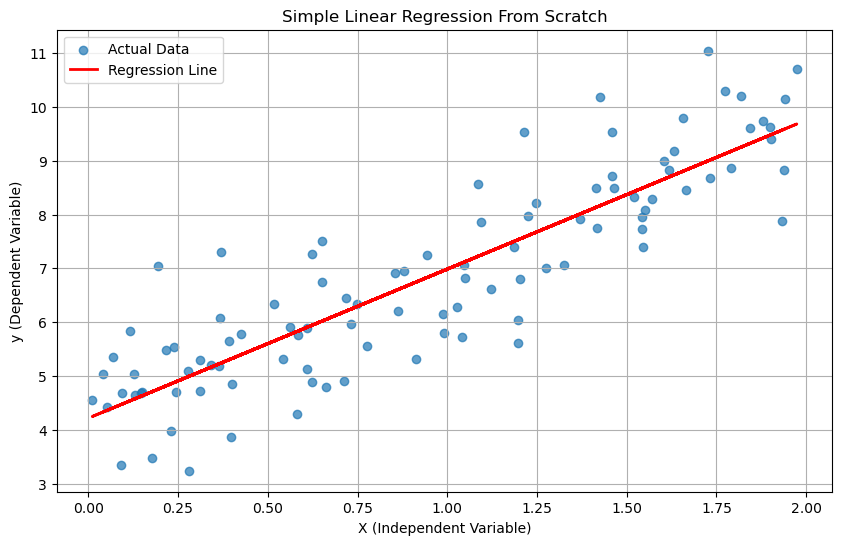


Predictions for new X values [0.5 1.5 2.5]: [ 5.60015285  8.37026624 11.14037962]


In [4]:

np.random.seed(42) # for reproducibility
X = 2 * np.random.rand(100, 1) # 100 data points, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

# Reshape X and y for easier processing if they are 2D arrays (e.g., from generated data)
X = X.flatten()
y = y.flatten()


# 2. Create an instance of our linear regression model
model = SimpleLinearRegression()

# 3. Fit the model to our data
model.fit(X, y)

# 4. Make predictions
y_pred = model.predict(X)

# 5. Evaluate the model
mse = model.mean_squared_error(y, y_pred)
r2 = model.r_squared(y, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 6. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Simple Linear Regression From Scratch')
plt.legend()
plt.grid(True)
plt.show()

# --- Example with new data points ---
X_new = np.array([0.5, 1.5, 2.5])
y_new_pred = model.predict(X_new)
print(f"\nPredictions for new X values {X_new}: {y_new_pred}")